In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
df = pd.read_csv('weatherHistory.csv',index_col=['Formatted Date'])

df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [128]:
df.shape

(96453, 10)

In [129]:
df=df.drop(['Summary','Precip Type','Temperature (C)','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)','Daily Summary'],axis=1)

In [130]:
df.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-01 00:00:00.000 +0200,7.388889,0.89
2006-04-01 01:00:00.000 +0200,7.227778,0.86
2006-04-01 02:00:00.000 +0200,9.377778,0.89
2006-04-01 03:00:00.000 +0200,5.944444,0.83
2006-04-01 04:00:00.000 +0200,6.977778,0.83


In [131]:
df.isnull().sum()

Apparent Temperature (C)    0
Humidity                    0
dtype: int64

In [132]:
df.index=pd.to_datetime(df.index,utc=True)
df

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,7.388889,0.89
2006-03-31 23:00:00+00:00,7.227778,0.86
2006-04-01 00:00:00+00:00,9.377778,0.89
2006-04-01 01:00:00+00:00,5.944444,0.83
2006-04-01 02:00:00+00:00,6.977778,0.83
...,...,...
2016-09-09 17:00:00+00:00,26.016667,0.43
2016-09-09 18:00:00+00:00,24.583333,0.48
2016-09-09 19:00:00+00:00,22.038889,0.56


In [133]:
resampled_data = df.resample('MS').mean()

In [134]:
resampled_data=resampled_data[resampled_data.index.year!=2005]
resampled_data

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
2006-05-01 00:00:00+00:00,15.539479,0.721801
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


<IPython.core.display.Javascript object>


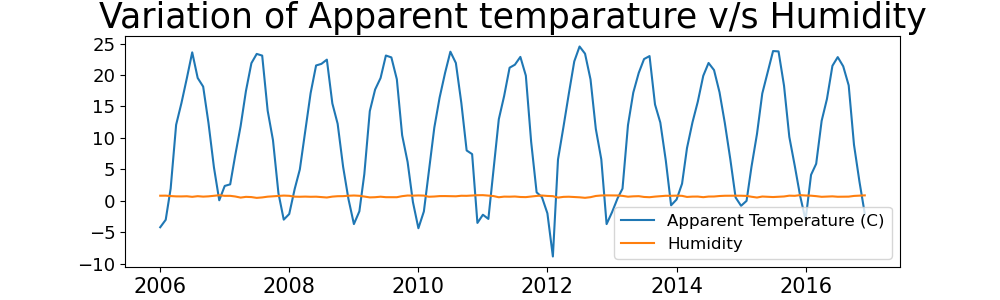

In [137]:
plt.figure(figsize=(10,3))
plt.plot(resampled_data['Apparent Temperature (C)'], label = 'Apparent Temperature (C)')
plt.plot(resampled_data['Humidity'], label='Humidity')
plt.title('Variation of Apparent temparature v/s Humidity', fontsize= 25)
plt.legend (loc=0, fontsize = 12)
plt.xticks (fontsize = 15);
plt.yticks (fontsize = 13);

<IPython.core.display.Javascript object>


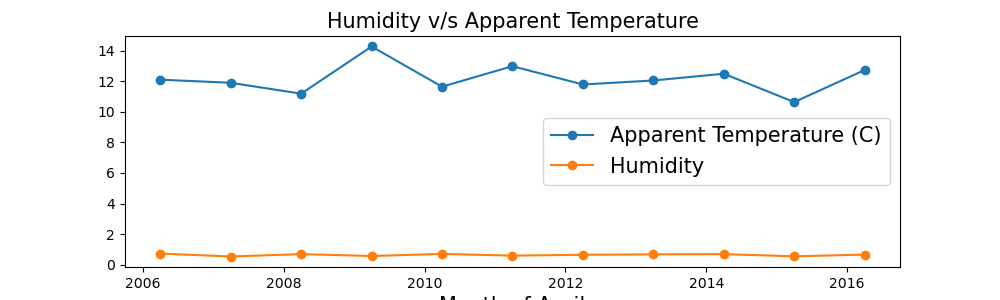

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

In [136]:
april = resampled_data[resampled_data.index.month==4]
plt.figure(figsize=(10,3))
plt.plot(april.loc['2006-04-01' : '2016-04-01','Apparent Temperature (C)'],label='Apparent Temperature (C)',marker='o')
plt.plot(april.loc['2006-04-01' : '2016-04-01','Humidity'],label='Humidity',marker='o' )
plt.legend (loc='center right', fontsize = 15)
plt.xlabel("Month of April", fontsize = 15)
plt.title("Humidity v/s Apparent Temperature", fontsize = 15)